In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

1. Reading the data from the CSV file

In [2]:
data = pd.read_csv('./data/data.csv')

In [3]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

2.Spliting the data into x and y 

In [4]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

3. Plotting the graph to show the data imbalance

0    6599
1     220
Name: Bankrupt?, dtype: int64
Total percentage of bankrupted companies is 3.2 %.


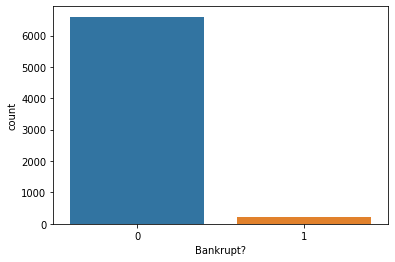

In [5]:
print(data["Bankrupt?"].value_counts())
percentage = data["Bankrupt?"].value_counts()[1]/len(data)
print("Total percentage of bankrupted companies is %.1f" %(percentage*100) + " %.")

sns.countplot(data["Bankrupt?"])
plt.show()

In [6]:
print(data["Bankrupt?"].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


4. Handling the data imbalance using SMOTE

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X,y)

print('New balance of 1 and 0 classes (%):')
y_sm.value_counts()

New balance of 1 and 0 classes (%):


1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [8]:
df_rs = pd.DataFrame(np.hstack((y_sm[:, None],X_sm)), columns=data.columns)
df_rs

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1.0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1.0,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360

5. Data is now balanced

1.0    6599
0.0    6599
Name: Bankrupt?, dtype: int64
Total percentage of bankrupted companies is 50.0 %.


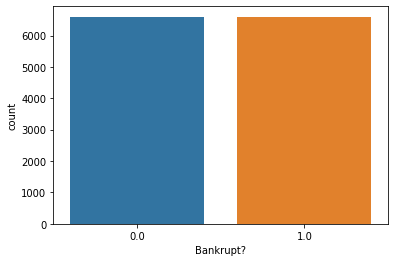

In [9]:
print(df_rs["Bankrupt?"].value_counts())
percentage = df_rs["Bankrupt?"].value_counts()[1]/len(df_rs)
print("Total percentage of bankrupted companies is %.1f" %(percentage*100) + " %.")

sns.countplot(df_rs["Bankrupt?"])
plt.show()

6. Droping single-value coloumn and spliting the data set into training and testing set

In [10]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop single-value column
    df = df.drop(' Net Income Flag', axis=1)
    df = df.drop(' Liability-Assets Flag', axis=1)
    
    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test



In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(df_rs)

In [12]:
X_new = df_rs.drop('Bankrupt?', axis=1)
y_new = df_rs['Bankrupt?']
X_new

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+

In [13]:
y_new

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13193    1.0
13194    1.0
13195    1.0
13196    1.0
13197    1.0
Name: Bankrupt?, Length: 13198, dtype: float64

7. Learning Models considered

In [14]:
original_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

8. Training the models

In [15]:
for name, model in original_models.items():
    print('name',name,'model',model)
    model.fit(X_train, y_train)
    print(name + " trained.")
   

name Logistic Regression model LogisticRegression(solver='liblinear')
Logistic Regression trained.
name K-Nearest Neighbors model KNeighborsClassifier()
K-Nearest Neighbors trained.
name Decision Tree model DecisionTreeClassifier()
Decision Tree trained.
name Support Vector Machine (Linear Kernel) model LinearSVC()
Support Vector Machine (Linear Kernel) trained.
name Support Vector Machine (RBF Kernel) model SVC()
Support Vector Machine (RBF Kernel) trained.
name Neural Network model MLPClassifier()
Neural Network trained.
name Random Forest model RandomForestClassifier()
Random Forest trained.
name Gradient Boosting model GradientBoostingClassifier()
Gradient Boosting trained.


9. Testing the models

In [16]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

Logistic Regression: 90.51%
K-Nearest Neighbors: 93.56%
Decision Tree: 94.39%
Support Vector Machine (Linear Kernel): 90.48%
Support Vector Machine (RBF Kernel): 95.20%
Neural Network: 98.56%
Random Forest: 97.53%
Gradient Boosting: 95.33%


10. Principal Component analysis

In [17]:
n_components = 50

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [18]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
10023,-1.447334,-0.326322,2.178392,-0.780511,0.860699,-0.293388,0.467198,-0.409311,1.131587,-0.354260,-0.626678,-0.772418,-0.844049,0.000702,-0.350393,-0.209699,-1.885084,-1.939183,-0.523789,0.254545,1.267452,-0.647738,1.350792,-0.101377,-1.026537,-1.382327,2.416947,0.886521,-1.683571,0.861405,-0.598761,0.664927,-2.841291,0.960581,-1.294690,2.205526,-0.589015,-0.983064,1.467054,0.455973,2.127447,-0.512435,0.298781,-0.673303,-0.299499,-1.082712,0.400492,0.706875,0.272835,0.273630
9815,1.588683,0.768996,-0.531641,-0.909071,2.515051,0.417961,0.507452,-0.174071,-0.465638,0.595975,0.434493,0.598253,1.075506,-0.457368,0.533051,-0.383475,-0.781085,-0.793343,-0.011797,0.472281,0.159469,-0.206500,0.448294,0.265134,-0.299884,0.104496,-0.098266,0.019660,0.274673,0.183115,-0.028303,0.354519,-0.118703,-0.205099,-0.171394,0.412065,0.108579,0.455790,-0.212495,-0.354816,-0.464259,-0.216703,0.294918,0.175480,-0.012645,-0.182333,-0.120931,-1.121487,-0.079359,0.589308
12248,-0.242211,0.035221,1.027855,-0.669879,1.259099,-0.394391,0.246697,0.068181,0.252637,-0.122478,-0.126617,-1.183737,-0.393993,-0.244496,0.111993,0.019999,-0.602130,-0.426510,-0.072943,-0.188079,-0.276242,0.105567,0.062713,0.655362,-0.396244,-0.257054,-0.274548,0.229859,0.426283,0.246598,0.006418,-0.288178,0.370564,0.564989,0.498826,-0.591907,0.160619,0.748771,0.301090,0.064902,0.267973,0.443336,0.703727,0.806409,0.094748,0.109616,0.560576,0.204946,-0.386693,0.150711
5388,6.418707,1.562306,-3.551606,0.115401,1.883674,-0.895512,-0.010684,0.542238,-0.223784,-0.443714,0.110747,-0.232033,-0.292946,-0.090773,-0.288602,-0.453474,-0.371001,0.260724,0.699299,-0.246135,0.060374,0.088021,0.993326,0.783218,-0.393551,-0.283347,-0.017862,-0.221877,0.462636,0.223191,-0.382145,-0.464406,0.241350,-0.768956,-0.050156,0.415292,-0.038099,0.133939,1.156565,-0.330511,-1.001436,0.431368,-0.166705,-1.002058,1.737627,-0.249974,0.054693,-0.233022,-0.042651,0.171232
12964,-6.839980,4.660769,0.043087,-0.658552,1.644447,1.210234,-0.341868,0.020230,0.352165,-0.695997,0.408967,0.416334,-0.348560,0.162307,-0.371406,-0.889105,0.179278,-0.551839,-0.681567,0.928063,0.443599,-0.180905,-0.366246,0.186796,-0.805231,0.247452,-0.491942,0.051311,-0.234241,-0.056990,0.643629,0.133219,-0.100977,-0.115949,-0.201793,0.453552,-0.598460,0.155586,-0.943046,-0.169872,-0.582846,0.268353,-0.109780,0.577353,-0.225145,-0.071870,0.769000,-0.202384,0.141832,0.391014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-8.312824,9.104851,-0.438845,0.640371,-1.279813,-1.266844,-0.313292,0.889425,0.557946,-1.554729,-1.461610,2.227605,-2.230047,0.273245,-0.908535,-3.342354,0.904112,0.156054,0.085167,2.590752,0.231816,3.936479,0.957136,0.723376,3.243908,-0.860399,-0.909342,1.545225,0.757582,0.740118,-2.455671,-0.970554,0.585191,3.099907,0.152007,0.375532,-1.151266,1.160369,-1.215796,0.214806,0.396663,0.395353,0.240133,0.283904,-0.102542,0.202905,-0.909060,0.794314,0.069545,-0.419762
905,1.905884,0.042536,-0.255014,0.336744,-0.705721,-0.845927,-0.122730,-0.035332,0.073518,-0.746850,0.602644,-0.577310,-0.182666,0.475943,-0.664100,-0.323034,0.822583,-0.039200,0.315006,0.298420,-0.660977,0.237190,0.155287,-0.048412,0.619770,0.263247,-0.073793,-0.251273,0.204704,-0.209106,0.246361,-0.255333,0.523854,-0.001792,-0.653988,0.171533,1.244303,-0.848497,0.549022,-0.735881,-0.181145,-0.545911,-0.378412,-0.505325,0.002031,0.023437,0.307141,-0.151108,-0.097397,0.262053
5192,3.801814,1.179210,-4.230718,-0.501952,3.504189,-0.981357,0.880885,0.295710,-1.082358,0.428749,0.175225,1.260714,-0.351161,-0.841607,0.670594,-0.594867,0.032776,2.212956,-0.543473,-1.410740,

In [19]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

11. Training models with PCA Components

In [20]:
reduced_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [21]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

Logistic Regression: 89.82%
K-Nearest Neighbors: 93.36%
Decision Tree: 94.02%
Support Vector Machine (Linear Kernel): 89.92%
Support Vector Machine (RBF Kernel): 94.17%
Neural Network: 98.18%
Random Forest: 97.60%
Gradient Boosting: 93.81%


In [22]:
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)
fig.show()